# INSTRUCTIONS:
#### Install plotly you would need in Geo Map subplots as part of our presentation 
*you can read on it via this link*  https://plot.ly/api/


# URLS for the project

## Neighborhood Data-Set:

#### https://www.huduser.gov/portal/datasets/fmr/smallarea/index.html

## Taxi Data-Set:

#### https://data.cityofnewyork.us/resource/74wj-s5ij.json (2010)  Yellow taxi
#### https://data.cityofnewyork.us/resource/uwyp-dntv.json (2011) Yellow taxi
#### https://data.cityofnewyork.us/resource/kerk-3eby.json (2012) Yellow taxi
#### https://data.cityofnewyork.us/resource/t7ny-aygi.json (2013) Yellow taxi
#### https://data.cityofnewyork.us/resource/gkne-dk5s.json (2014) Yellow taxi
#### https://data.cityofnewyork.us/resource/7j25-xd5y.json (2014) Green taxi




In [41]:
from IPython.display import IFrame
IFrame('https://www.google.com/maps/d/embed?mid=1VYN-6Vkk01byUCF7P13rT6ORT5g&hl=en_US', width=1000, height=480)

#<iframe src="https://www.google.com/maps/d/embed?mid=1VYN-6Vkk01byUCF7P13rT6ORT5g&hl=en_US" width="640" height="480"></iframe>


In [184]:
%matplotlib inline 
import pandas as pd
import requests 
from io import StringIO
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import geopandas as gpd
from shapely import ops
from shapely import geometry as geom
import os
import urllib
from sjoin import sjoin
%matplotlib inline


ImportError: No module named 'sjoin'

In [43]:
urls  = [        'https://data.cityofnewyork.us/resource/7j25-xd5y.json',
                 'https://data.cityofnewyork.us/resource/uwyp-dntv.json',
                 'https://data.cityofnewyork.us/resource/kerk-3eby.json',
                 'https://data.cityofnewyork.us/resource/t7ny-aygi.json',
                 'https://data.cityofnewyork.us/resource/gkne-dk5s.json',
                 'https://data.cityofnewyork.us/resource/7j25-xd5y.json ']

def year_url(url):
    query    = (url)
    raw_data = pd.read_json(query)
    return (raw_data)

data_010 = year_url(urls[0])
data_011 = year_url(urls[1])
data_012 = year_url(urls[2])
data_013 = year_url(urls[3])
data_014 = year_url(urls[4])

#cleaning the data-set for the green-taxi 2014 since its diff attributes with the yellow taxi
cols = ['dropoff_latitude', 'dropoff_longitude','lpep_dropoff_datetime','lpep_pickup_datetime','pickup_latitude',
        'pickup_longitude','tip_amount','trip_distance']

green_014 = pd.DataFrame(year_url(urls[5]), columns = cols)
green_014.head()

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [2]:
#EJ check what i did here and replicate it for 2010 - 2013
#copy and paste the urls above and add this : "?vendor_id=VTS&payment_type=CRD&$limit=50000" at 
#the end of the url run it for payment_type = CRD and payment_type = CSH (2 RUNS PER URL)
Y_14_ur ='https://data.cityofnewyork.us/resource/gkne-dk5s.json?vendor_id=VTS&payment_type=CRD&$limit=50000'
raw_data_14 = pd.read_json(Y_14_ur)
raw_data_14.head()
raw_data_14.to_csv('raw_data_14_crd_vts.csv', sep='\t')
Y_14_ur_CSH ='https://data.cityofnewyork.us/resource/gkne-dk5s.json?vendor_id=VTS&payment_type=CSH&$limit=50000'
raw_data_14_CSH = pd.read_json(Y_14_ur_CSH)
raw_data_14_CSH.shape

(50000, 17)

In [208]:
url = 'https://data.cityofnewyork.us/resource/t7ny-aygi.geojson?vendorid=VTS&payment_type=CRD&$limit=500'
response = requests.get(url)
data = response.json()
df = pd.io.json.json_normalize(data['features'])
k = gpd.GeoDataFrame(df)
k.columns.values

array(['geometry.coordinates', 'geometry.type',
       'properties.dropoff_latitude', 'properties.dropoff_longitude',
       'properties.extra', 'properties.fare_amount', 'properties.mta_tax',
       'properties.passenger_count', 'properties.payment_type',
       'properties.pickup_latitude',
       'properties.pickup_location.coordinates',
       'properties.pickup_location.type', 'properties.pickup_longitude',
       'properties.ratecodeid', 'properties.store_and_fwd_flag',
       'properties.tip_amount', 'properties.tolls_amount',
       'properties.total_amount', 'properties.tpep_dropoff_datetime',
       'properties.tpep_pickup_datetime', 'properties.trip_distance',
       'properties.vendorid', 'type'], dtype=object)

In [11]:
#save the data in array inorder to modify some attributes 
#processed_data = [data_010,data_011,data_012,data_013,data_014,green_014]

#there some columns in our yellow taxi data-set that contains the same data we need but diff column name
#fix for it
"""for i in range(len(processed_data)):
    for j in processed_data[i].columns.values:
        if j == 'lpep_dropoff_datetime' or j == 'tpep_dropoff_datetime':
            processed_data[i].rename(columns={j: 'dropoff_datetime' }, inplace=True)
            
        if j == 'lpep_pickup_datetime'   or j == 'tpep_pickup_datetime':
            processed_data[i].rename(columns={j: 'pickup_datetime' }, inplace=True)"""

#cleaning other yellow taxi data-set so that it only contains the columns we need
def needed_col(data):
    cols_y = ['dropoff_latitude', 'dropoff_longitude','dropoff_datetime' , 'pickup_datetime',
              'pickup_latitude','pickup_longitude','tip_amount','trip_distance']
    refine_data = pd.DataFrame(data, columns = cols_y)
    return (refine_data)

#y_data_010 = needed_col(data_010)
#y_data_011 = needed_col(data_011)
#y_data_012 = needed_col(data_012)
#y_data_013 = needed_col(data_013)
#y_data_014 = needed_col(data_014)

In [19]:
raw_data_14_trim = needed_col(raw_data_14)
raw_data_14_trim.head()
raw_data_14_trim.shape
raw_data_14_trimCS = needed_col(raw_data_14_CSH)
fineshed_data_14 =raw_data_14_trim.append(raw_data_14_trimCS)
fineshed_data_14.to_csv('fineshed_data_14.csv', sep='\t')

In [161]:
zipgeojson = "https://github.com/YuHuaCheng/Map/raw/master/data/nyc-zip-code-tabulation-areas-polygons.geojson"
#zipgeojson = "https://github.com/dwillis/nyc-maps/raw/master/boroughs.geojson"
zipsfile = os.path.join("data",zipgeojson.split("/")[-1])

try:
    bb = gpd.read_file(zipsfile)
except OSError as e:
    urllib.request.urlretrieve(zipgeojson, zipsfile)
    
    #zips geojson had a var assignment that caused problems
    fin = open(zipsfile)
    
    lines = [line for line in fin]
    lines[0] = lines[0].replace("var nycdata = ", "")
    
    fin.close()
    
    fout = open(zipsfile, "w")
    for line in lines:
        fout.write(line)
    fout.flush()
    fout.close()
    
    bb = gpd.read_file(zipsfile)
gpd.read_file(zipsfile)

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,4.941836e+07,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,6.938587e+07,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365
5,http://nyc.pediacities.com/Resource/PostalCode...,0,081,6,Elmhurst,NY,36,4.265940e+07,33755.870988,Queens,POLYGON ((-73.88722098467157 40.72752618766134...,11373
6,http://nyc.pediacities.com/Resource/PostalCode...,0,081,7,Floral Park,NY,36,9.155180e+06,13594.924549,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11001
7,http://nyc.pediacities.com/Resource/PostalCode...,0,081,8,Forest Hills,NY,36,5.558777e+07,36277.076839,Queens,"POLYGON ((-73.8562474640478 40.7367227854824, ...",11375
8,http://nyc.pediacities.com/Resource/PostalCode...,0,081,9,Queens Village,NY,36,3.956834e+07,31231.968593,Queens,POLYGON ((-73.74168681424477 40.73682340115314...,11427
9,http://nyc.pediacities.com/Resource/PostalCode...,0,081,10,Rego Park,NY,36,2.520346e+07,26323.994393,Queens,POLYGON ((-73.86451198956482 40.73407164841783...,11374


In [4]:
a = bb.geometry[1]
b = bb[bb.CTY_FIPS == '047']
reseted_idx_b = b.reset_index()
reseted_idx_b.geometry

0     POLYGON ((-73.93822325191614 40.68389331961758...
1     POLYGON ((-73.94564165707669 40.69203346946512...
2     POLYGON ((-73.93822325191614 40.68389331961758...
3     POLYGON ((-73.93739763108535 40.67972992244106...
4     POLYGON ((-73.9029413249695 40.67084010909053,...
5     POLYGON ((-73.95797316022487 40.6706572921663,...
6     POLYGON ((-73.97208109550313 40.65059692046753...
7     POLYGON ((-73.96190027949535 40.65487097940547...
8     POLYGON ((-73.98905871482322 40.64411926279492...
9     POLYGON ((-73.95839960006599 40.63632695865279...
10    POLYGON ((-73.96451268712488 40.63668758541607...
11    POLYGON ((-73.98108387444439 40.63529018910907...
12    POLYGON ((-73.96165513906905 40.72586761551694...
13    POLYGON ((-73.9291946344389 40.72464651898886,...
14    POLYGON ((-73.92816524502244 40.71420826250719...
15    POLYGON ((-73.93480281087365 40.71337251459106...
16    POLYGON ((-73.97555763713035 40.69951930078222...
17    POLYGON ((-73.99803886394621 40.6987666558

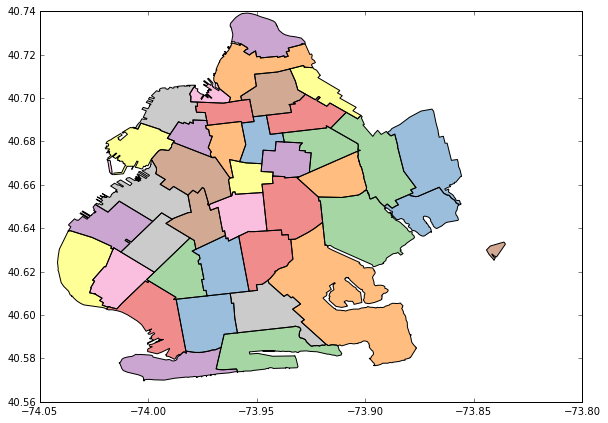

In [43]:
reseted_idx_b.geometry.plot(figsize = (14,7))

In [13]:
pick_points = []
for i in range (len(fineshed_data_14)):
    pick_points.append(geom.Point(fineshed_data_14.pickup_longitude.iloc[i],
                                  fineshed_data_14.pickup_latitude.iloc[i]))
len(pick_points)

100000

In [74]:
from shapely.geometry import shape

In [132]:
#sg_roads = df[df.geometry.within(sg_boundary)]
pick_points_df = gpd.GeoSeries(pick_points)
#for i, pt in enumerate(pick_points_df):
    #pick_points_df_BK = pick_points_df[reseted_idx_b.geometry.contains(pt)]
    #pick_points_df_BK = pick_points_df[shape(pt).within(reseted_idx_b.geometry) == True]
#g = loads('POINT (0.0 0.0)')
pick_points_df = pick_points_df[pick_points_df.values != 'POINT (0.0 0.0)']
#for i, pt in enumerate(pick_points_df):
    #pick_points_df_BK = pick_points_df[reseted_idx_b.geometry.contains(pt)]
    #pick_points_df_BK = pick_points_df[pt.within(reseted_idx_b.geometry) == True]
shape(reseted_idx_b.geometry[0]).within(shape(multi(reseted_idx_b.geometry)))

NameError: name 'multi' is not defined

In [206]:
import urllib.request
u = 'https://data.cityofnewyork.us/resource/t7ny-aygi.geojson?vendorid=VTS&payment_type=CRD&$limit=500'
#page = urllib.request.urlopen(u)
#page = requests.get(u).content
f = open("map.geojson", "w")
response = urllib.request.urlopen(u)
data = response.read()      # a `bytes` object
text = data.decode('utf-8')
f.write(text, sep='\t')
f.close()


TypeError: write() takes no keyword arguments

In [ ]:
for i in range(len)

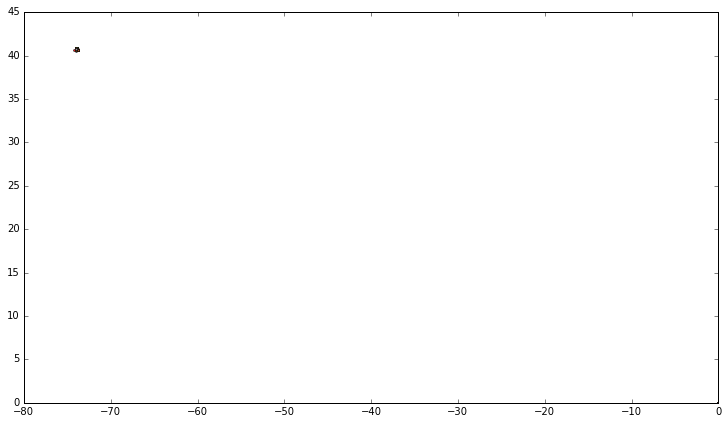

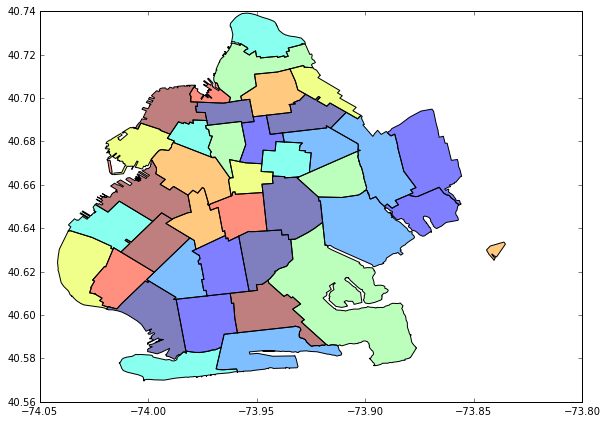

In [96]:
df = pick_points_df
df = df[1000:10000]
df.plot(figsize = (14,7))
reseted_idx_b.plot(figsize = (14,7))



In [35]:
drop_points = []
for i in range (len(fineshed_data_14)):
    drop_points.append(geom.Point(fineshed_data_14.dropoff_longitude.iloc[i],
                                  fineshed_data_14.dropoff_latitude.iloc[i]))
len(drop_points)

100000

In [42]:
drop_points_df = gpd.GeoSeries(drop_points)
drop_points_df_BK = drop_points_df[drop_points_df.geometry.within(reseted_idx_b.geometry) == True]
len(drop_points_df_BK)

0

In [197]:
kdg = gpd.GeoDataFrame(geometry=pick_points_df.values)
#kdg = kdg[kdg.geometry.within(reseted_idx_b.geometry)==True]
reseted_idx_b['geometry'][0].contains(kdg[0])


KeyError: 0

In [185]:
points = [geom.Point(-73.94650690661533, 40.68857526610002)]
gs = gpd.GeoSeries(points)
gd = gpd.GeoDataFrame(geometry=gs)
gd.within(reseted_idx_b)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
dtype: bool

E                
-73.964212
40.725870

N
-73.954141
40.739439

S
40.569736
-73.99999

W
40.626839
-73.847699

Mid = 40.638583 -73.954122

In [36]:
x_y = [40.638583, -73.954122]
radius = np.sqrt((-73.954141 + 73.954122 )**2 + (40.739439 - 40.638583)**2)

#check = ReWeek1tb2[ReWeek1tb2.DROPTIME <= '2016-11-1 05:00']

In [37]:
dropoff_brooklyn_10 = y_data_010[np.sqrt((y_data_010.dropoff_latitude - x_y[0])**2 
                                     +(y_data_010.dropoff_longitude - x_y[1])**2) <= radius] 

pickup_brooklyn_10  = y_data_010[np.sqrt((y_data_010.pickup_latitude - x_y[0])**2 
                                     +(y_data_010.pickup_longitude - x_y[1])**2) <= radius] 

trips_in_Bk_10 = pickup_brooklyn_10.append(dropoff_brooklyn_10)

#trips_in_Bk.to_csv('trips_in_BK.CSV', sep='\t')
print (pickup_brooklyn_10.shape)
print (dropoff_brooklyn_10.shape)
print (trips_in_Bk_10.shape)

NameError: name 'y_data_010' is not defined

In [ ]:
dropoff_brooklyn_11 = y_data_011[np.sqrt((y_data_011.dropoff_latitude - x_y[0])**2 
                                     +(y_data_011.dropoff_longitude - x_y[1])**2) <= radius] 

pickup_brooklyn_11  = y_data_011[np.sqrt((y_data_011.pickup_latitude - x_y[0])**2 
                                     +(y_data_011.pickup_longitude - x_y[1])**2) <= radius] 

trips_in_Bk_11 = pickup_brooklyn_11.append(dropoff_brooklyn_11)

trips_in_Bk_11.to_csv('trips_in_BK_11.CSV', sep='\t')
print (pickup_brooklyn_11.shape)
print (dropoff_brooklyn_11.shape)
print (trips_in_Bk_11.shape)

In [ ]:
dropoff_brooklyn_12 = y_data_012[np.sqrt((y_data_012.dropoff_latitude - x_y[0])**2 
                                     +(y_data_012.dropoff_longitude - x_y[1])**2) <= radius] 

pickup_brooklyn_12  = y_data_012[np.sqrt((y_data_012.pickup_latitude - x_y[0])**2 
                                     +(y_data_012.pickup_longitude - x_y[1])**2) <= radius] 

trips_in_Bk_12 = pickup_brooklyn_12.append(dropoff_brooklyn_12)

trips_in_Bk_12.to_csv('trips_in_BK_12.CSV', sep='\t')
print (pickup_brooklyn_12.shape)
print (dropoff_brooklyn_12.shape)
print (trips_in_Bk_12.shape)

In [ ]:
dropoff_brooklyn_13 = y_data_013[np.sqrt((y_data_013.dropoff_latitude - x_y[0])**2 
                                     +(y_data_013.dropoff_longitude - x_y[1])**2) <= radius] 

pickup_brooklyn_13  = y_data_013[np.sqrt((y_data_013.pickup_latitude - x_y[0])**2 
                                     +(y_data_013.pickup_longitude - x_y[1])**2) <= radius] 

trips_in_Bk_13 = pickup_brooklyn_13.append(dropoff_brooklyn_13)

trips_in_Bk_13.to_csv('trips_in_BK_13.CSV', sep='\t')
print (pickup_brooklyn_13.shape)
print (dropoff_brooklyn_13.shape)
print (trips_in_Bk_13.shape)

In [ ]:
dropoff_brooklyn_14 = y_data_013[np.sqrt((y_data_014.dropoff_latitude - x_y[0])**2 
                                     +(y_data_014.dropoff_longitude - x_y[1])**2) <= radius] 

pickup_brooklyn_14  = y_data_013[np.sqrt((y_data_014.pickup_latitude - x_y[0])**2 
                                     +(y_data_014.pickup_longitude - x_y[1])**2) <= radius] 

trips_in_Bk_14 = pickup_brooklyn_14.append(dropoff_brooklyn_14)

trips_in_Bk_14.to_csv('trips_in_BK_14.CSV', sep='\t')
print (pickup_brooklyn_14.shape)
print (dropoff_brooklyn_14.shape)
print (trips_in_Bk_14.shape)

In [ ]:
tb = {'2010': trips_in_Bk_10.count().iloc[0], 
      '2011': trips_in_Bk_11.count().iloc[0],
      '2012': trips_in_Bk_12.count().iloc[0],
      '2013': trips_in_Bk_13.count().iloc[0],
      '2014': trips_in_Bk_14.count().iloc[0],}
trips_in_Bk = pd.Series(tb)
trips_in_Bk


In [ ]:
ax = trips_in_Bk.plot(kind='bar', title ="Distribution of trips over time", figsize=(14, 7), legend=True, fontsize=12)
ax.set_xlabel("Years", fontsize=12)
ax.set_ylabel("Trips", fontsize=12)
plt.grid(True)
plt.show()


[All_trips](https://smallchey.carto.com/builder/a8044a82-b7ff-11e6-8171-0ef7f98ade21/embed)

[Brooklyn_Trips_2010](https://smallchey.carto.com/builder/a50b51d0-b7e2-11e6-a982-0ecd1babdde5/embed)

[Brooklyn_Trips_2011](https://smallchey.carto.com/builder/4451bc96-b7ea-11e6-8dc3-0e98b61680bf/embed)

[Brooklyn_Trips_2012](https://smallchey.carto.com/builder/7bba8d9a-b7ed-11e6-8c80-0e3a376473ab/embed)

[Brooklyn_Trips_2013](https://smallchey.carto.com/builder/9e96c2d8-b7ee-11e6-af99-0ef24382571b/embed)

[Brooklyn_Trips_2014](https://smallchey.carto.com/builder/67c3d06a-b7ef-11e6-b61c-0ef24382571b/embed)



In [ ]:


scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = y_data_014['pickup_longitude'],
        lat = y_data_014['pickup_latitude'],
        #text = df['text'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = True,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            #color = df_sum_arrivals['cnt'],
            #cmax = df_sum_arrivals['cnt'].max(),
            #colorbar=dict(
               # title="Trips in BK"
            #)
        ))]

layout = dict(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        #colorbar = True,   
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 1    
        ),
    )

#fig = dict( data=data, layout=layout )
#url = py.plot( fig, validate=False, filename='d3-airports' )
fig = Figure( data=data, layout=layout )
py.iplot(fig, filename='k')


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

map = Basemap(projection='cyl', 
              lat_0=0, lon_0=0)
map.drawmapboundary(fill_color='#7777ff')
map.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
map.drawcoastlines()

lons = y_data_014.pickup_longitude.values
lats = y_data_014.pickup_latitude.values
#cases = np.array([1971, 7069, 6073, 4, 6, 20, 1, 1])
#deaths = np.array([1192, 2964, 1250, 1, 5, 8, 0, 0])
#places = np.array(['Guinea', 'Liberia', 'Sierra Leone','United States', 'Mali', 'Nigeria', 'Senegal', 'Spain'])

x, y = map(lons, lats)

map.scatter(x, y, c='r', alpha=0.5)

axins = zoomed_inset_axes(ax, 7, loc=1)
axins.set_xlim(-20, 0)
axins.set_ylim(3, 18)

plt.xticks(visible=False)
plt.yticks(visible=False)

map2 = Basemap(llcrnrlon=-74.260380,llcrnrlat=40.485808,
               urcrnrlon=-73.699206,urcrnrlat=40.917691, ax=axins, ellps='WGS84',
            resolution='h', area_thresh=0.6)

map2.drawmapboundary(fill_color='#7777ff')
map2.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
map2.drawcoastlines()
map2.drawcountries()
map2.drawstates()

map2.scatter(x, y, c='r', alpha=0.5)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

In [ ]:

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap

# create the map
map = Basemap(llcrnrlon=-74.260380,llcrnrlat=40.485808,
               urcrnrlon=-73.699206,urcrnrlat=40.917691, ax=axins, ellps='WGS84',
            resolution='h', area_thresh=0.6)
# load the shape file with "states"
map.readshapefile('shapefiles/geo_export_7e54be64-4015-4221-9615-1045aa077da2',name = 'Brooklyn',drawbounds=True)

# set a geo coordinate (for example, new york)
lat = 0
lon = 0
x,y = map(lat, lon)

# place it on the map
map.plot(x, y, 'ro', markersize=4)
map.drawmapboundary(fill_color='#7777ff')
map.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
map.drawcoastlines()

plt.show()


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(llcrnrlon=-0.5,llcrnrlat=39.8,urcrnrlon=4.,urcrnrlat=43.,
             resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = 1)

map.drawmapboundary()
map.fillcontinents(color='#ddaa66',lake_color='aqua')
map.drawcoastlines()

map.readshapefile('shapefiles/geo_export_7e54be64-4015-4221-9615-1045aa077da2', 'geo_export_7e54be64-4015-4221-9615-1045aa077da2', 
                 drawbounds=True)

plt.show()

In [ ]:
y_data_014.to_csv('y_data_014.CSV', sep='\t')
y_data_014.shape

In [ ]:
""""y =y_data_014.append(y_data_013)
x =y_data_012.append(y_data_011)
f1 = x.append(y)
f2 = f1.append(y_data_010)
f2.to_csv('all.CSV', sep='\t')
f2.shape"""